In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import nupack

In [2]:
pfile = nupack.ParameterFile(material='RNA', dG='rna1995.dG', dH='rna1995.dH')
mod = nupack.Model(T=310, dangles='coax', gt=True, parameters=pfile)

## Schedule the calculations to perform

In [3]:
strands = ('CAGTCGATC', 'ATCGACGTA')

# Create an Analysis object for calculating complex ensemble quantities
analysis = nupack.Analysis(mod)

# Schedule calculation of partition functions for all complexes composed from the given strands, up to size 3
analysis.partition_function(strands, max_size=3)

# Schedule calculation of pair probabilities for all complexes up to size 2
analysis.pair_probability(strands, max_size=2)

# Schedule calculation of pair probabilities for all complexes up to size 2
analysis.min_free_energy(strands, max_size=2)

# Schedule calculation of 10 random Boltzmann samples from the given complex
analysis.boltzmann_sample(strands, number=10)

# Schedule calculation of all suboptimal structures within 0.4 kcal/mol of the MFE for the given complex
analysis.suboptimal_structure(strands, gap=0.4)

In [4]:
results = analysis.compute()


The complex free energy is -11.2137 kcal/mol

The complex MFE is -10.0045 kcal/mol

All complex partition functions up to size 3
    1.1215e+00 is the partition function of CAGTCGATC
    8.0464e+07 is the partition function of ATCGACGTA+CAGTCGATC
    1.0531e+00 is the partition function of ATCGACGTA
    2.6950e+05 is the partition function of ATCGACGTA+ATCGACGTA
    3.7914e+09 is the partition function of ATCGACGTA+CAGTCGATC+CAGTCGATC
    2.6365e+07 is the partition function of CAGTCGATC+CAGTCGATC+CAGTCGATC
    2.0540e+09 is the partition function of ATCGACGTA+ATCGACGTA+ATCGACGTA
    1.1227e+10 is the partition function of ATCGACGTA+ATCGACGTA+CAGTCGATC
    1.4563e+05 is the partition function of CAGTCGATC+CAGTCGATC

The single strand free energies:
    CAGTCGATC: -0.0706 kcal/mol
    ATCGACGTA: -0.0319 kcal/mol

Some Boltzmann samples, done simultaneously:
    0 .(((((...+..)))))..
    1 ((((((...+..)))))).
    2 ((((((...+..)))))).
    3 ((((((...+..)))))).
    4 ((((((...+..)))))).


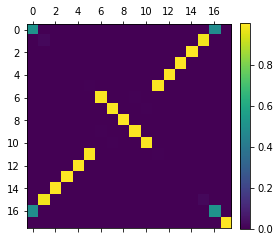

In [5]:
print('\nThe complex free energy is %.4f kcal/mol' % results[strands].free_energy)

print('\nThe complex MFE is %.4f kcal/mol' % results[strands].min_free_energy)

print('\nAll complex partition functions up to size 3')
for seqs, result in results.items():
    print('    %8.4e is the partition function of %s' % (np.exp(result.log_partition_function), '+'.join(seqs)))

print('\nThe single strand free energies:')
for seq in strands:
    print('    %s: %.4f kcal/mol' % (seq, results[(seq,)].free_energy))

print('\nSome Boltzmann samples, done simultaneously:')
for i, s in enumerate(results[strands].sampled_structures):
    print('   ', i, s.dp())
    
print('\nSubopt structures, done simultaneously:')
for i, (s, e) in enumerate(results[strands].suboptimal_structures):
    print('    %d %s %7.3f' % (i, s.dp(), e))
    
print('\nThe complex pair probability matrix:')
plt.matshow(results[strands].pair_probability)
plt.colorbar(fraction=0.046, pad=0.04);

In [6]:
solver = nupack.ConcentrationSolver(strands, results)

concentration_result = solver.compute([1e-6, 1e-7]).complex_concentrations()

for seqs, c in concentration_result.items():
    print('%.3e is the concentration of %s' % (c, '+'.join(seqs)))

9.443e-07 is the concentration of CAGTCGATC
5.384e-08 is the concentration of ATCGACGTA+CAGTCGATC
4.615e-08 is the concentration of ATCGACGTA
4.693e-12 is the concentration of ATCGACGTA+ATCGACGTA
3.874e-14 is the concentration of ATCGACGTA+CAGTCGATC+CAGTCGATC
1.725e-15 is the concentration of CAGTCGATC+CAGTCGATC+CAGTCGATC
1.895e-17 is the concentration of ATCGACGTA+ATCGACGTA+ATCGACGTA
5.971e-15 is the concentration of ATCGACGTA+ATCGACGTA+CAGTCGATC
9.362e-10 is the concentration of CAGTCGATC+CAGTCGATC
